# Craft a Story from a Dataset Exercise

In [1]:
import pandas as pd

# Load 
data = pd.read_csv('adult.csv')

# first few rows
print(data.head())

# summary of the dataset?
print(data.info())

# missing values?
print(data.isnull().sum())

# basic statistics 
print(data.describe())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

What is income like by education level?

In [2]:
# income by education level
education_income = data.groupby(['education', 'income']).size().unstack()

print(education_income)

income        <=50K  >50K
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063


It seems like overall the higher someone's education is, the higher their income is.

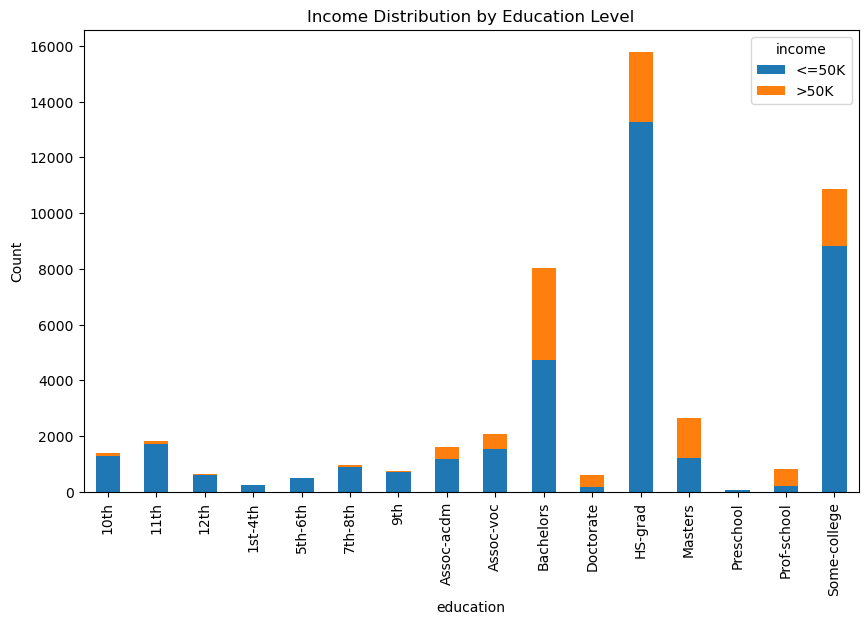

In [3]:
import matplotlib.pyplot as plt

# Bar plot ..education vs income
education_income.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Education Level')
plt.ylabel('Count')
plt.show()

How correlated is income, hours worked per week, and age?

In [4]:
# Convert income to binary (0 for <=50K, 1 for >50K)
data['income_binary'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Correlation between age, hours-per-week, and income
correlation = data[['age', 'hours-per-week', 'income_binary']].corr()

print(correlation)

                     age  hours-per-week  income_binary
age             1.000000        0.071558       0.230369
hours-per-week  0.071558        1.000000       0.227687
income_binary   0.230369        0.227687       1.000000


What is income distribution like by gender?

income  <=50K  >50K
gender             
Female  14423  1769
Male    22732  9918


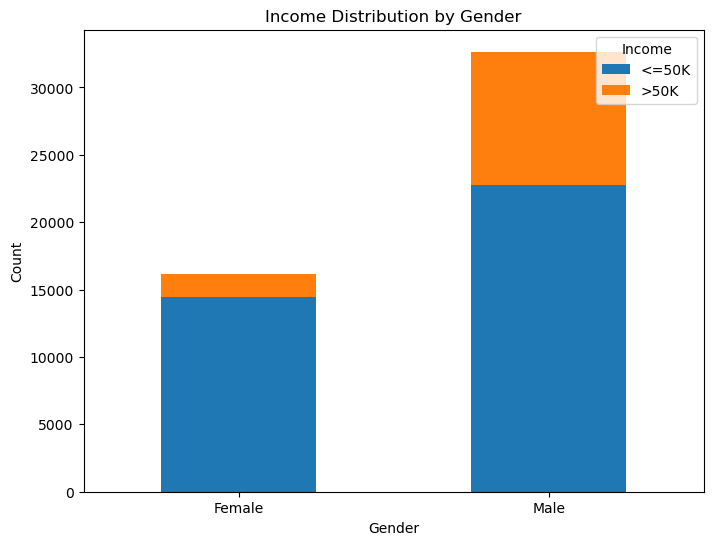

In [6]:
# Grouping by gender and income
gender_income = data.groupby(['gender', 'income']).size().unstack()

# Displaying the result
print(gender_income)

# Plotting
gender_income.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Income Distribution by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Income', loc='upper right')
plt.show()

What are the occupations that pay the most and pay the least?

Top 5 Most Earning Occupations:
occupation
Exec-managerial    2908
Prof-specialty     2784
Sales              1475
Craft-repair       1383
Adm-clerical        768
Name: >50K, dtype: int64

Top 5 Least Earning Occupations:
occupation
Adm-clerical      4843
Craft-repair      4729
Other-service     4719
Sales             4029
Prof-specialty    3388
Name: <=50K, dtype: int64


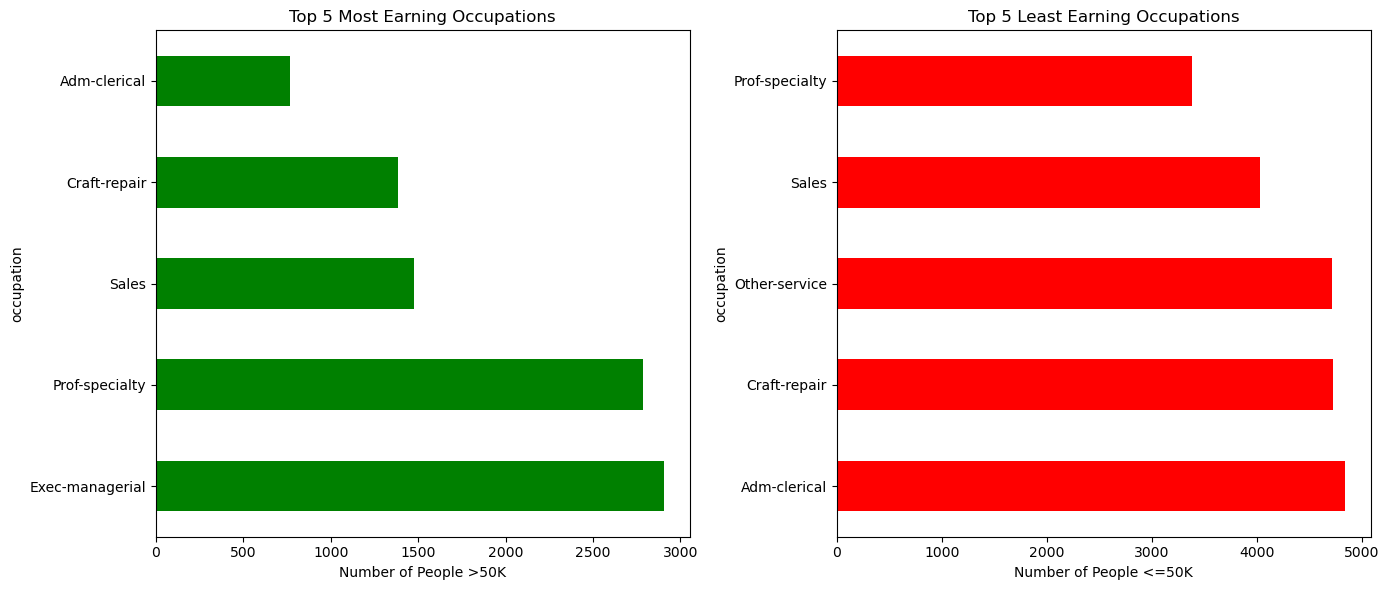

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Grouping occupation and income
occupation_income = data.groupby(['occupation', 'income']).size().unstack()

# Displaying occupations by people >= $50K
top_earning_occupations = occupation_income['>50K'].sort_values(ascending=False)
least_earning_occupations = occupation_income['<=50K'].sort_values(ascending=False)

# Displaying the most earning occupations
print("Top 5 Most Earning Occupations:")
print(top_earning_occupations.head())

# Displaying the least earning occupations
print("\nTop 5 Least Earning Occupations:")
print(least_earning_occupations.head())

# Visualizing the top 5 earning and least earning occupations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plotting for most earning occupations
top_earning_occupations.head().plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 5 Most Earning Occupations')
axes[0].set_xlabel('Number of People >50K')

# Bar plotting for least earning occupations
least_earning_occupations.head().plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('Top 5 Least Earning Occupations')
axes[1].set_xlabel('Number of People <=50K')

plt.tight_layout()
plt.show()

Very oddly enough it seams like sales, adm-clerical,  and craft-repair are both in the highest and least earning occupations along with prof-specialty, and exceutives are the highest earners.

It is shocking that both being a speicalized professional is both the second highest earning occupation, and the fifth lowest earning occupation, so it goes to show that your specialization matters.